In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import math
pd.set_option('display.max_columns', None)

df=pd.read_csv('hmda_2017_ny_all-records_labels.csv')
#df=pd.read_csv('hmda_2017_nationwide_all-records_labels.csv')
print(df.shape)
df.head(10)

C:\Users\josep\AppData\Local\Temp\ipykernel_22080\3205669797.py:7: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('hmda_2017_ny_all-records_labels.csv')


(446902, 78)


,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,0003303298,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,705,Not applicable,3,Loan originated,1,"New York, Jersey City, White Plains - NY, NJ",35614.0,New York,NY,36,New York County,61.0,146.02,"Information not provided by applicant in mail,...",3,No co-applicant,5,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",3,No co-applicant,5,462.0,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,7748.0,16.330000,73700.0,291.769989,1232.0,78.0,NaN
1,2017,75-2921540,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Owner-occupied as a principal dwelling,1,112,Not applicable,3,Loan originated,1,NaN,NaN,New York,NY,36,Clinton County,19.0,1010.00,Not Hispanic or Latino,2,No co-applicant,5,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,2,No co-applicant,5,96.0,Freddie Mac (FHLMC),3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,4182.0,9.520000,62500.0,164.960007,1068.0,1492.0,NaN
2,2017,11-3019327,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Not owner-occupied as a principal dwelling,2,356,Preapproval was not requested,2,Application denied by financial institution,3,"New York, Jersey City, White Plains - NY, NJ",35614.0,New York,NY,36,Kings County,47.0,626.00,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,No co-applicant,5,115.0,Loan was not originated or was not sold in cal...,0,Other,9.0,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,NaN,2670.0,45.540001,73700.0,81.410004,665.0,682.0,NaN
3,2017,20-0193314,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,Manufactured housing,2,Home purchase,1,Owner-occupied as a principal dwelling,1,58,Not applicable,3,Application denied by financial institution,3,"Utica, Rome - NY",46540.0,New York,NY,36,Oneida County,65.0,230.00,"Information not provided by applicant in mail,...",3,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,

In [11]:
# Shorten the name 
# Look at only home purchase mortgage application
# home purchase
# conventional loan
# 1 to 4 family house
# owner occupied
# secured by first lien
df['applicant_race_name_1'].replace({'Information not provided by applicant in mail, Internet, or telephone application': 'Not provided'},inplace=True)
df = df.loc[df['loan_purpose'].isin([1])]
df = df.loc[df['loan_type'].isin([1])]
df = df.loc[df['property_type'].isin([1])]
df = df.loc[df['owner_occupancy'].isin([1])]
df = df.loc[df['lien_status'].isin([1])]


In [12]:
#df_income_race = df.loc[df['lien_status'].isin([1])]

In [13]:
# How many people apply in 2017? Filter by home purchase only
print("Number of applicants: ", len(df))

Number of applicants:  122741


In [14]:
num_applied_american_indian = df['applicant_race_name_1'].value_counts()['American Indian or Alaska Native']
num_applied_asian = df['applicant_race_name_1'].value_counts()['Asian']
num_applied_black = df['applicant_race_name_1'].value_counts()['Black or African American']
num_applied_notprovided= df['applicant_race_name_1'].value_counts()['Not provided']
num_applied_hawaiian = df['applicant_race_name_1'].value_counts()['Native Hawaiian or Other Pacific Islander']
num_applied_notapplicable= df['applicant_race_name_1'].value_counts()['Not applicable']
num_applied_white = df['applicant_race_name_1'].value_counts()['White']

print("Number of American Indian or Alaska Native applied: ",num_applied_american_indian)
print("Number of Asian applied: ",num_applied_asian)
print("Number of Black or African American applied: ",num_applied_black)
print("Number of Not provided applied: ",num_applied_notprovided)
print("Number of Native Hawaiian or Other Pacific Islander applied: ",num_applied_hawaiian)
print("Number of Not applicable applied: ",num_applied_notapplicable)
print("Number of Whites applied: ",num_applied_white)



Number of American Indian or Alaska Native applied:  390
Number of Asian applied:  17239
Number of Black or African American applied:  5354
Number of Not provided applied:  15248
Number of Native Hawaiian or Other Pacific Islander applied:  319
Number of Not applicable applied:  138
Number of Whites applied:  84053


In [15]:
#print(type(df['applicant_race_name_1'].value_counts()['American Indian or Alaska Native']))
#print(num_applied_american_indian)

In [16]:
df_by_race = df.groupby(by='applicant_race_name_1').count()
#df_ap_by_race = df_approved_by_race['action_taken']
df_by_race

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
applicant_race_name_1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
American Indian or Alaska Native,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,369,369,390,390,390,390,390,390,390,390,390,390,390,120,120,27,27,2,2,2,2,390,390,10,10,5,5,1,1,1,1,390,390,390,390,383,390,390,62,62,17,17,3,3,5,390,390,390,390,0,0,0,390,390,390,390,390,390,0
Asian,17239,17239,17239,17239,17239,17239,17239,17239,17239,17239,17239,17239,17239,17239,17239,17239,17239,17239,17129,17129,17239,17239,17239,17233,17233,17232,17239,17239,17239,17239,17239,190,190,4,4,0,0,0,0,17239,17239,47,47,0,0,0,0,0,0,17239,17239,17239,17239,16506,17239,17239,1506,1506,402,402,96,96,776,17239,17239,17239,17239,0,0,0,17232,17232,17232,17232,17232,17232,0
Black or African American,5354,5354,5354,5354,5354,5354,5354,5354,5354,5354,5354,5354,5354,5354,5354,5354,5354,5354,5271,5271,5354,5354,5354,5345,5345,5345,5354,5354,5354,5354,5354,88,88,0,0,0,0,0,0,5354,5354,12,12,0,0,0,0,0,0,5354,5354,5354,5354,5302,5354,5354,731,731,197,197,40,40,79,5354,5354,5354,5354,0,0,0,5345,5345,5345,5345,5345,5345,0
Native Hawaiian or Other Pacific Islander,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,319,314,314,319,319,319,318,318,318,319,319,319,319,319,38,38,4,4,0,0,0,0,319,319,2,2,0,0,0,0,0,0,319,319,319,319,316,319,319,44,44,10,10,3,3,4,319,319,319,319,0,0,0,318,318,318,318,318,318,0
Not applicable,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,138,136,136,138,138,138,138,138,138,138,138,138,138,138,0,0,0,0,0,0,0,0,138,138,0,0,0,0,0,0,0,0,138,138,138,138,15,138,138,5,5,3,3,0,0,1,138,138,138,138,0,0,0,138,138,138,138,138,138,0
Not provided,15248,15248,15248,15248,15248,15248,15248,15248,15248,15248,15248,15248,15248,15248,15248,15248,15248,15248,14640,14641,15248,15248,15248,15216,15216,15216,15248,15248,15248,15248,15248,0,0,0,0,0,0,0,0,15248,15248,4,4,0,0,0,0,0,0,15248,15248,15248,15248,14926,15248,15248,1967,1967,420,420,110,110,58,15248,15248,15248,15248,0,0,0,15216,15216,15216,15216,15216,15216,0
White,84053,84053,84053,84053,84053,84053,84053,84053,84053,84053,84053,84053,84053,84053,84053,84053,84053,84053,78573,78577,84053,84053,84053,84034,84034,84032,84053,84053,84053,84053,84053,64,64,6,6,2,2,0,0,84053,84053,85,85,5,5,0,0,0,0,84053,84053,84053,84053,82937,84053,84053,5590,5590,1258,1258,293,293,865,84053,84053,84053,84053,0,0,0,84032,84032,84032,84032,84032,84032,0


In [17]:
#df_by_race2 = df.groupby(by='applicant_race_name_1').value_count()['Asian']

<AxesSubplot: ylabel='action_taken'>

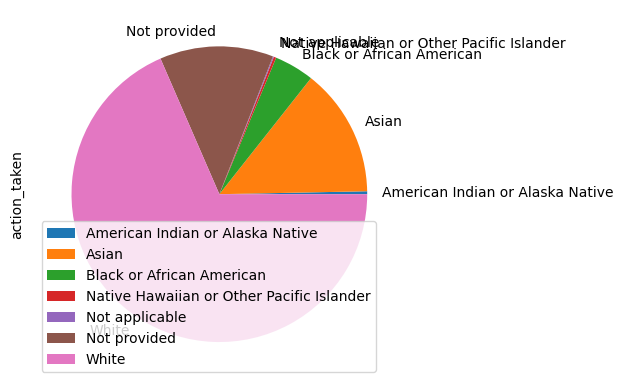

In [18]:
# Distribution of race in applicant
df_by_race.plot(kind='pie',y='action_taken')

In [19]:
#df.plot(kind='pie',y='action_taken')

In [20]:
df_by_race_hp = df_by_race.groupby(by='applicant_race_name_1').count()

Analysis on approved applicants

In [21]:
df_approved = df[df['action_taken'].isin([1])]
#print(df_approved.head())
num_approved = len(df_approved)
print("Number of applicants approved: ", num_approved)

Number of applicants approved:  92655


In [22]:
#df_approved.plot(x="applicant_race_1", y="action_taken", kind="bar")
# plotting age on the same axis
#df.plot(x="Name", y="Age", kind="bar", ax=ax, color="maroon")

In [41]:
df_approved_by_race = df_approved.groupby(by='applicant_race_name_1').count()
df_approved_by_race = df_approved_by_race['action_taken']
df_approved_by_race

applicant_race_name_1
American Indian or Alaska Native               267
Asian                                        12635
Black or African American                     3510
Native Hawaiian or Other Pacific Islander      207
Not applicable                                 104
Not provided                                 10267
White                                        65665
Name: action_taken, dtype: int64

In [24]:
print(type(df_approved_by_race))

<class 'pandas.core.series.Series'>


In [25]:
num_approved_american_indian = df_approved_by_race[0]
num_approved_asian = df_approved_by_race[1]
num_approved_black = df_approved_by_race[2]
num_approved_notprovided= df_approved_by_race[5]
num_approved_hawaiian = df_approved_by_race[3]
num_approved_notapplicable= df_approved_by_race[4]
num_approved_white = df_approved_by_race[6]

num_approved_race = [num_approved_american_indian,num_approved_asian,num_approved_black]

In [26]:
print(type(df_approved_by_race))

<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Approval distribution by race- Home Purchase Only')

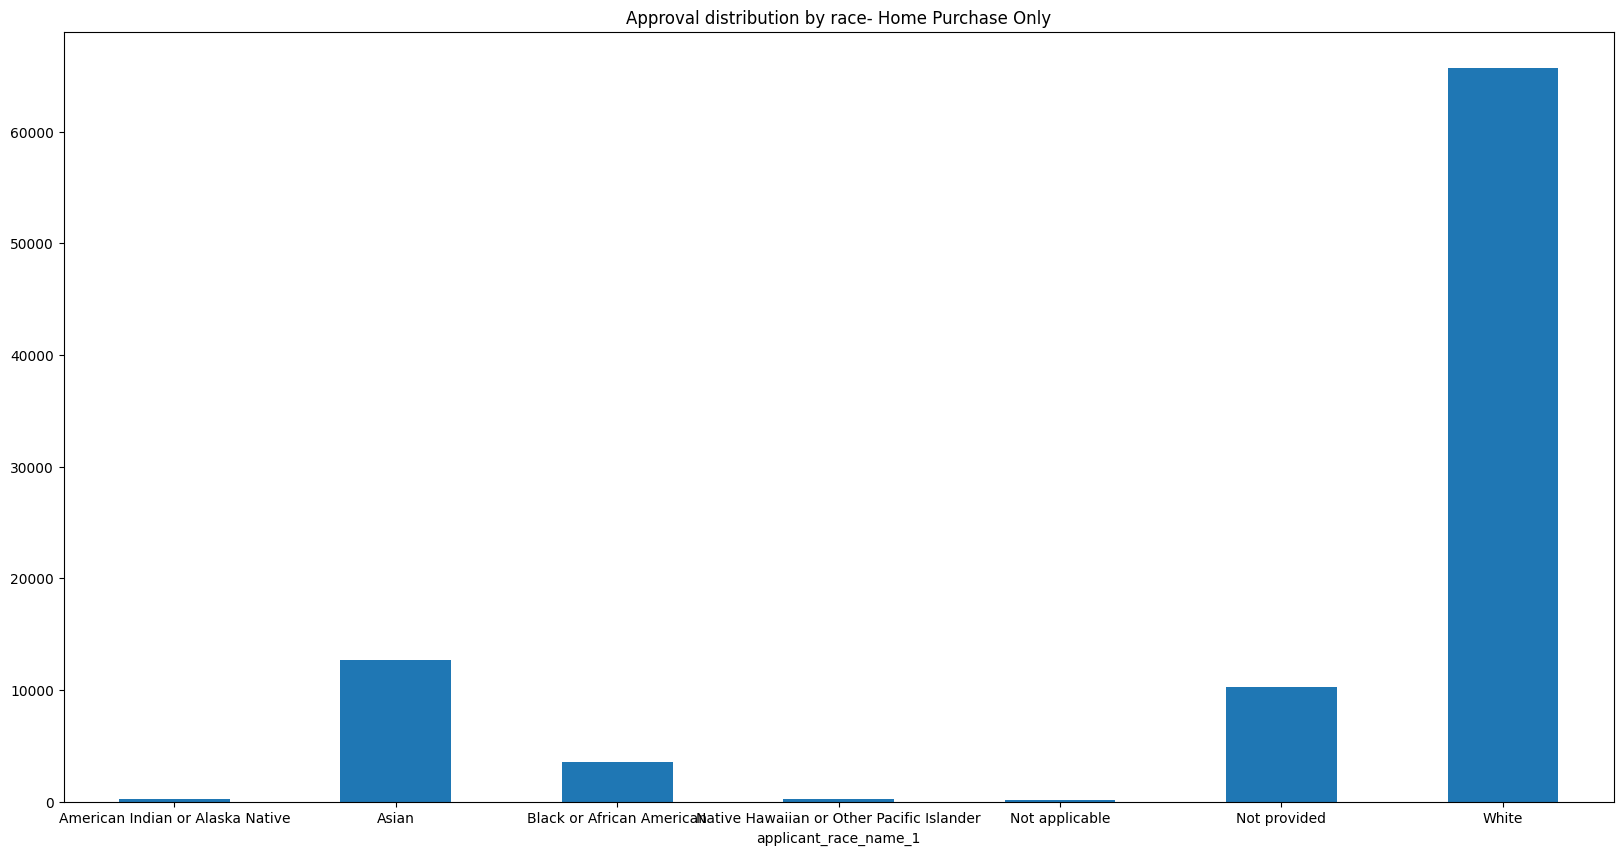

In [27]:
df_approved_by_race.plot.bar(x="race", y="number of approvals",rot=0,figsize=(20,10))
plt.title("Approval distribution by race- Home Purchase Only")


Approval rate = Number of approved by race/ total number of applicants in that race

In [28]:
approval_rate_american_indian = num_approved_american_indian/num_applied_american_indian 
approval_rate_asian = num_approved_asian/num_applied_asian
approval_rate_black = num_approved_black/num_applied_black
approval_rate_notprovided = num_approved_notprovided/num_applied_notprovided
approval_rate_hawaiian = num_approved_hawaiian/num_applied_hawaiian 
approval_rate_notapplicable = num_approved_notapplicable/num_applied_notapplicable
approval_rate_white = num_approved_white/num_applied_white 

print("Approval rate for American Indian/Alaska Native: ",approval_rate_american_indian )
print("Approval rate for Asian: ",approval_rate_asian   )
print("Approval rate for Black or African American: ",approval_rate_black  )
print("Approval rate for Not provided: ",approval_rate_notprovided  )
print("Approval rate for Native Hawaiian or Other Pacific Islander: ",approval_rate_hawaiian )
print("Approval rate for Not applicable: ",approval_rate_notapplicable )
print("Approval rate for Whites: ",approval_rate_white )



Approval rate for American Indian/Alaska Native:  0.6846153846153846
Approval rate for Asian:  0.7329311444979407
Approval rate for Black or African American:  0.6555846096376541
Approval rate for Not provided:  0.6733342077649528
Approval rate for Native Hawaiian or Other Pacific Islander:  0.6489028213166145
Approval rate for Not applicable:  0.7536231884057971
Approval rate for Whites:  0.7812332694847298


get rid of not applicable   
compare different groups with each other   
95% confidence interval, Z= 1.96   
the difference between the mean   

find differences between acceptance between each race


Other tests:   
multiple regression on categorical data   
Chi square goodness of fit   


filter further with home purchasing only   


Find 95% confidence interval on difference in approval between asian and white   

population 1 (asian):   
p1 = approval rate of asian = 0.6853    
q1 = 1 - 0.6853 = 0.3147   

population 2 (white):     
p2 = approval rate of white = 0.6923    
q2 = 1 - 0.6923 = 0.3077   
 
At 95% CI, Z = 1.96   
n1 = number of asian approved = 16613  
n2 = number of white approved = 1000019   
(p1-p2)+-(1.96)(sqrt(p1q1/n1+p2q2/n2))      

-0.01455 < p1-p2 (actual) < 5.46e-4    

-----> There is zero in the interval, statistically no significant difference   


Now do it exhaustively to compare all combinations of race



In [29]:
# use these to make confidence interval

def confidence_test(p1,p2,n1,n2):
    lower_bound = (p1-p2)-(1.96)*(math.sqrt((p1*(1-p1)/n1)+(p2*(1-p2)/n2)))
    upper_bound = (p1-p2)+(1.96)*(math.sqrt((p1*(1-p1)/n1)+(p2*(1-p2)/n2)))
    if (lower_bound<0) and (upper_bound>0):
        print(lower_bound,"< p1-p2 (actual) <", upper_bound,"0 is in the interval. NO significant difference")
    else:
        print(lower_bound,"< p1-p2 (actual) <", upper_bound,"YES, There is a significant difference")


# Since there are 7 race categories, we have 7C2 = 21 all possible ways to compare

#white_vs_asian
confidence_test(approval_rate_asian,approval_rate_white,num_applied_asian,num_applied_white)


-0.05547368972485155 < p1-p2 (actual) < -0.04113056024872664 YES, There is a significant difference


In [30]:
race = ["american indian","asian","black","not provided","native hawaiian","not applicable","whites"]

# Python program to print all
# the possible combinations

from itertools import combinations
  
def rSubset(arr, r):
  
    # return list of all subsets of length r
    # to deal with duplicate subsets use 
    # set(list(combinations(arr, r)))
    return list(combinations(arr, r))
arr = ["american indian","asian","black","not provided","native hawaiian","not applicable","whites"]
r = 2
res = rSubset(arr, r)
print (res)
print(len(res))



[('american indian', 'asian'), ('american indian', 'black'), ('american indian', 'not provided'), ('american indian', 'native hawaiian'), ('american indian', 'not applicable'), ('american indian', 'whites'), ('asian', 'black'), ('asian', 'not provided'), ('asian', 'native hawaiian'), ('asian', 'not applicable'), ('asian', 'whites'), ('black', 'not provided'), ('black', 'native hawaiian'), ('black', 'not applicable'), ('black', 'whites'), ('not provided', 'native hawaiian'), ('not provided', 'not applicable'), ('not provided', 'whites'), ('native hawaiian', 'not applicable'), ('native hawaiian', 'whites'), ('not applicable', 'whites')]
21


In [31]:
# American Indian vs everyone else
print("American Indian vs Asian")
confidence_test(approval_rate_american_indian,approval_rate_asian,num_applied_american_indian,num_applied_asian)
print("American Indian vs Black")
confidence_test(approval_rate_american_indian,approval_rate_black,num_applied_american_indian,num_applied_black)
print("American Indian vs Not Provided")
confidence_test(approval_rate_american_indian,approval_rate_notprovided,num_applied_american_indian,num_applied_notprovided)
print("American Indian vs Native Hawaiian")
confidence_test(approval_rate_american_indian,approval_rate_hawaiian,num_applied_american_indian,num_applied_hawaiian)
print("American Indian vs Not Applicable")
confidence_test(approval_rate_american_indian,approval_rate_notapplicable,num_applied_american_indian,num_applied_notapplicable)
print("American Indian vs Whites")
confidence_test(approval_rate_american_indian,approval_rate_white,num_applied_american_indian,num_applied_white)



American Indian vs Asian
-0.09490395013264372 < p1-p2 (actual) < -0.0017275696324684786 YES, There is a significant difference
American Indian vs Black
-0.01881115851867505 < p1-p2 (actual) < 0.07687270847413613 0 is in the interval. NO significant difference
American Indian vs Not Provided
-0.03543343741196772 < p1-p2 (actual) < 0.0579957911128314 0 is in the interval. NO significant difference
American Indian vs Native Hawaiian
-0.03407631708922958 < p1-p2 (actual) < 0.10550144368676988 0 is in the interval. NO significant difference
American Indian vs Not Applicable
-0.1544221385570374 < p1-p2 (actual) < 0.01640653097621242 0 is in the interval. NO significant difference
American Indian vs Whites
-0.1428201645111522 < p1-p2 (actual) < -0.05041560522753817 YES, There is a significant difference


In [32]:
print("Asian vs Black")
confidence_test(approval_rate_asian,approval_rate_black,num_applied_asian,num_applied_black)
print("Asian vs Not Provided")
confidence_test(approval_rate_asian,approval_rate_notprovided,num_applied_asian,num_applied_notprovided)
print("Asian vs Native Hawaiian")
confidence_test(approval_rate_asian,approval_rate_hawaiian,num_applied_asian,num_applied_hawaiian)
print("Asian vs Not Applicable")
confidence_test(approval_rate_asian,approval_rate_notapplicable,num_applied_asian,num_applied_notapplicable)
print("Asian vs Whites")
confidence_test(approval_rate_asian,approval_rate_white,num_applied_asian,num_applied_white)

Asian vs Black
0.06300668488314323 < p1-p2 (actual) < 0.09168638483743005 YES, There is a significant difference
Asian vs Not Provided
0.04964525936797708 < p1-p2 (actual) < 0.0695486140979988 YES, There is a significant difference
Asian vs Native Hawaiian
0.031233735177412257 < p1-p2 (actual) < 0.13682291118524023 YES, There is a significant difference
Asian vs Not Applicable
-0.09288892251294259 < p1-p2 (actual) < 0.0515048346972298 0 is in the interval. NO significant difference
Asian vs Whites
-0.05547368972485155 < p1-p2 (actual) < -0.04113056024872664 YES, There is a significant difference


In [33]:
print("Black vs Not Provided")
confidence_test(approval_rate_black,approval_rate_notprovided,num_applied_black,num_applied_notprovided)
print("Black vs Native Hawaiian")
confidence_test(approval_rate_black,approval_rate_hawaiian,num_applied_black,num_applied_hawaiian)
print("Black vs Not Applicable")
confidence_test(approval_rate_black,approval_rate_notapplicable,num_applied_black,num_applied_notapplicable)
print("Black vs White")
confidence_test(approval_rate_black,approval_rate_white,num_applied_black,num_applied_white)

Black vs Not Provided
-0.03249500460773884 < p1-p2 (actual) < -0.0030041916468585735 YES, There is a significant difference
Black vs Native Hawaiian
-0.04722238269010901 < p1-p2 (actual) < 0.06058595933218822 0 is in the interval. NO significant difference
Black vs Not Applicable
-0.17105077234026966 < p1-p2 (actual) < -0.025026385196016396 YES, There is a significant difference
Black vs White
-0.1386802549408606 < p1-p2 (actual) < -0.11261706475329089 YES, There is a significant difference


In [34]:
print("Native Hawaiian vs Not Applicable")
confidence_test(approval_rate_hawaiian,approval_rate_notapplicable,num_applied_hawaiian,num_applied_notapplicable)
print("Native Hawaiian vs White")
confidence_test(approval_rate_hawaiian,approval_rate_white,num_applied_hawaiian,num_applied_white)

Native Hawaiian vs Not Applicable
-0.1936721384900363 < p1-p2 (actual) < -0.015768595688328974 YES, There is a significant difference
Native Hawaiian vs White
-0.18478480638384798 < p1-p2 (actual) < -0.07987608995238273 YES, There is a significant difference


fha or not fha?
---federal governement ensure the loan, encourages bank to make more loan,vehicle for red lining, safe place: 
white neighborhood. lender for low-income people, raise premium rates since 2014, for blacks and latinos,

market segmentation in loan type
single-family home


## What are the reasons for the disparities?

In [35]:
df_approved_american_indian = df_approved[df_approved['applicant_race_1'].isin([1])]
df_approved_asian = df_approved[df_approved['applicant_race_1'].isin([2])]
df_approved_black = df_approved[df_approved['applicant_race_1'].isin([3])]
df_approved_hawaiian = df_approved[df_approved['applicant_race_1'].isin([4])]
df_approved_white = df_approved[df_approved['applicant_race_1'].isin([5])]

avg_income_american_indian = df_approved_american_indian['applicant_income_000s'].mean()
avg_income_asian = df_approved_asian['applicant_income_000s'].mean()
avg_income_black = df_approved_black['applicant_income_000s'].mean()
avg_income_hawaiian = df_approved_hawaiian['applicant_income_000s'].mean()
avg_income_white = df_approved_white['applicant_income_000s'].mean()
print("Average income of approved american indian: ", avg_income_american_indian*1000)
print("Average income of approved asian: ", avg_income_asian*1000)
print("Average income of approved black: ", avg_income_black*1000)
print("Average income of approved hawaiian: ", avg_income_hawaiian*1000)
print("Average income of approved white: ", avg_income_white*1000)

Average income of approved american indian:  122413.79310344828
Average income of approved asian:  144846.56216305878
Average income of approved black:  113554.69199769717
Average income of approved hawaiian:  134341.46341463414
Average income of approved white:  155047.40089464755


In [37]:
# Average loan amount

avg_loan_american_indian = df_approved_american_indian['loan_amount_000s'].mean()
avg_loan_asian = df_approved_asian['loan_amount_000s'].mean()
avg_loan_black = df_approved_black['loan_amount_000s'].mean()
avg_loan_hawaiian = df_approved_hawaiian['loan_amount_000s'].mean()
avg_loan_white = df_approved_white['loan_amount_000s'].mean()
print("Average loan amount of approved american indian: ", avg_loan_american_indian*1000)
print("Average loan amount of approved asian: ", avg_loan_asian*1000)
print("Average loan amount of approved black:", avg_loan_black*1000)
print("Average loan amount of approved hawaiian: ", avg_loan_hawaiian*1000)
print("Average loan amount of approved white: ", avg_loan_white*1000)

Average loan amount of approved american indian:  307142.32209737826
Average loan amount of approved asian:  447151.8796992481
Average loan amount of approved bloan 295782.90598290594
Average loan amount of approved hawaiian:  381265.7004830918
Average loan amount of approved white:  352458.78321784816


Inconclusive, need a better dataset that publishes interest rate, income, debt to income ratio,etc...

In [38]:
df_rejected = df[df['action_taken'].isin([3])]
#print(df_approved.head())
num_rejected = len(df_rejected)
print("Number of applicants rejected: ", num_rejected)

Number of applicants approved:  11803


In [42]:
df_rejected_by_race = df_rejected.groupby(by='applicant_race_name_1').count()
df_rejected_by_race = df_rejected_by_race['action_taken']
df_rejected_by_race

applicant_race_name_1
American Indian or Alaska Native               68
Asian                                        2000
Black or African American                     894
Native Hawaiian or Other Pacific Islander      55
Not applicable                                  7
Not provided                                 2166
White                                        6613
Name: action_taken, dtype: int64

Text(0.5, 1.0, 'Rejected distribution by race- Home Purchase Only')

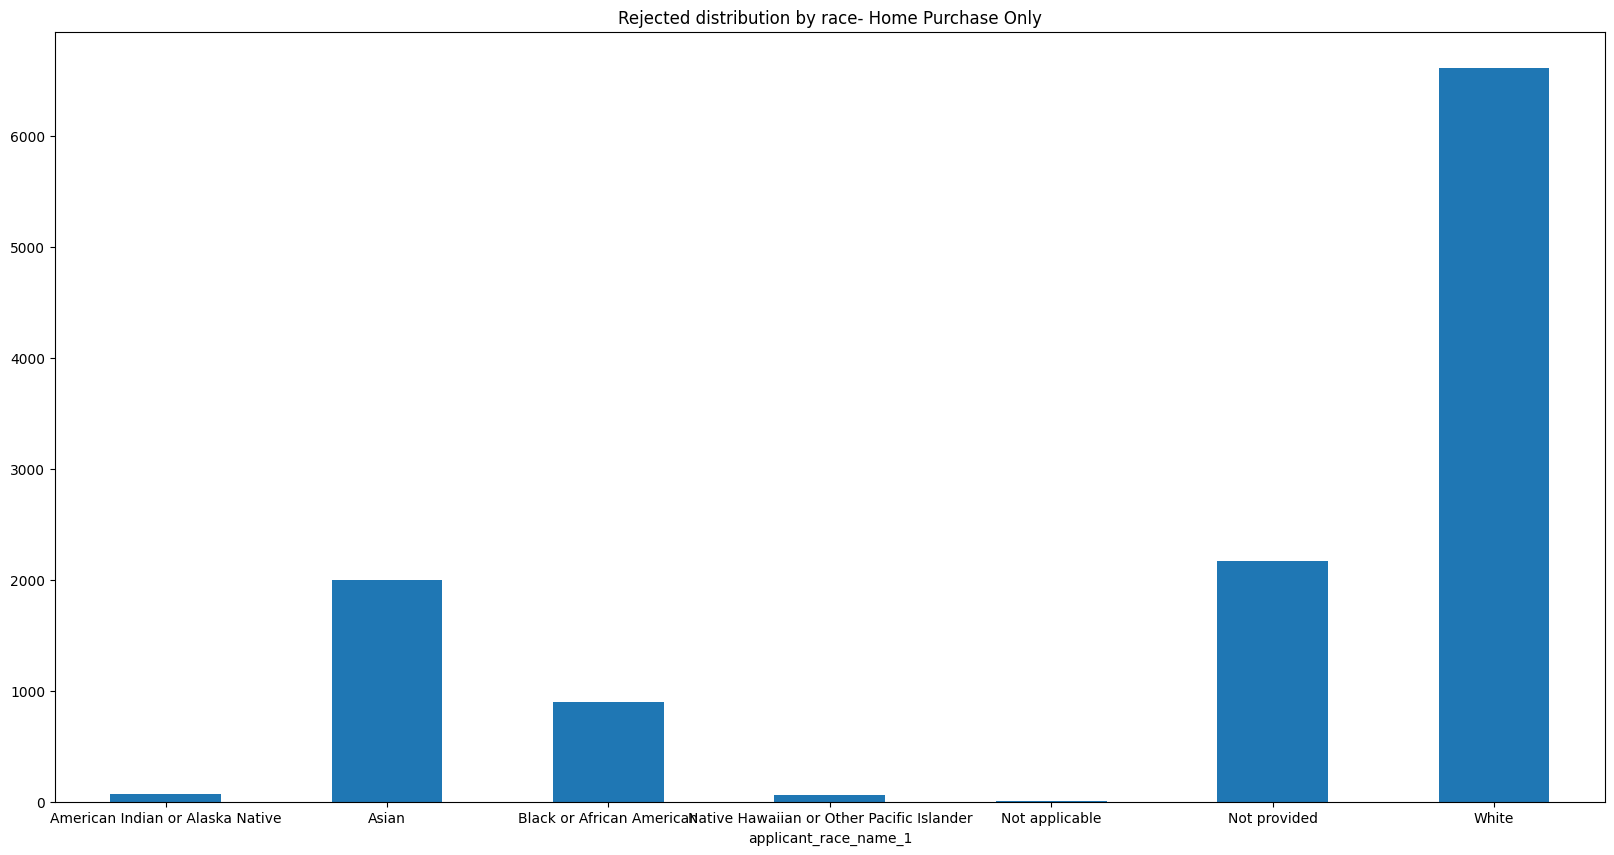

In [43]:
df_rejected_by_race.plot.bar(x="race", y="number of approvals",rot=0,figsize=(20,10))
plt.title("Rejected distribution by race- Home Purchase Only")